### 목차
- 그래프 기본
- DFS
- BFS
- Union-Find(Disjoint set)

# 그래프
### 그래프 기본
- 그래프는 아이템(사물 또는 추상적 개념)들과 이들 사이의 연결 관계를 표현한다.
- 그래프는 정점(Vertex) 들의 집합과 이들을 연결하는 간선(Edge) 들의 집합으로 구성된 자료 구조
  - 참고
    - |V| : 정점의 개수 , |E| : 그래프에 포함된 간선의 개수
    - |V|개의 정점을 가지는 그래프는 최대 |V|(|V|-1)/2 간선이 가능
      - 예 ) 5개 정점이 있는 그래프의 최대 간선 수는 10(=5*4/2)개이다.
- 선형 자료구조나 트리 자료구조로 표현하기 어려운 N:N 관계를 가지는 원소들을 표현하기에 용이하다.

### 그래프 유형
- 무향 그래프(Undirected Graph) : 친구
- 유향 그래프(Directed Graph)   : 인스타
- 가중치 그래프(Weighted Graph) : 도로건설비용, 비행기비용 (무향, 유향은 문제마다 다름)
- 사이클 없는 방향 그래프(DAG, Directed Acyclic Graph) : 트리
- 참고
  - 완전 그래프 (최악의 케이스)
    - 정점들에 대해 가능한 모든 간선들을 가진 그래프 
  - 부분 그래프
    - 원래 그래프에서 일부의 정점이나 간선을 제외한 그래프
  
  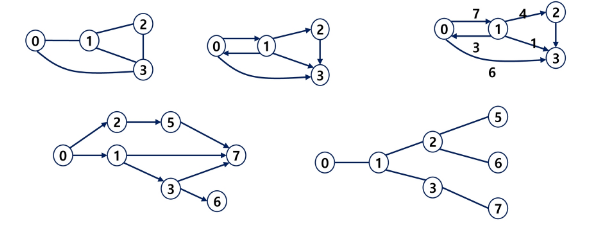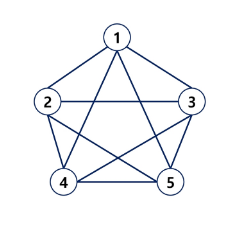

### 용어

- 인접(Adjacency)
  - 두 개의 정점에 간선이 존재(연결됨)하면 서로 인접해있다고 한다.
  - 완전 그래프에 속한 임의의 두 정점들은 모두 인접해있다.

- 경로
  - 간선들을 순서대로 나열한 것
  - 경로 중 한 정점을 최대 한번만 지나는 경로를 단순 경로라고 한다
  - 시작한 정점에서 끝나는 경로를 사이클이라고 한다

### 그래프 표현
- 간선의 정보를 저장하는 방식, 메모리나 성능을 고려해서 결정


- 인접 행렬(Adjacent matrix)
  - "연결이 안되어있다"는 정보도 함께 저장된다
  - |V| x |V| 크기의 2차원 배열을 이용해서 간선 정보를 저장
  - 배열의 배열(포인터 배열)
  - 단점 : 메모리 낭비가 심하다(연결이 안되어있는 것도 저장)
  - 장점 : 연결 여부를 한번에 탐색할 수 있다

</br>

- 인접 리스트 
  - 코테에서 많이 사용
  - 각 정점마다 해당 정점으로 나가는 간선의 정보를 저장
  - 연결된 정보만 저장
  - 단점 : 연결 정보 확인이 어렵다(확인하려면 무조건 안으로 들어가서 순회해야 함)
  - 장점 : 메모리 활용이 효율적이다

</br>
  
- 간선의 배열
  - 간선(시작 정점, 끝 정점)을 배열에 연속적으로 저장


### 인접 행렬
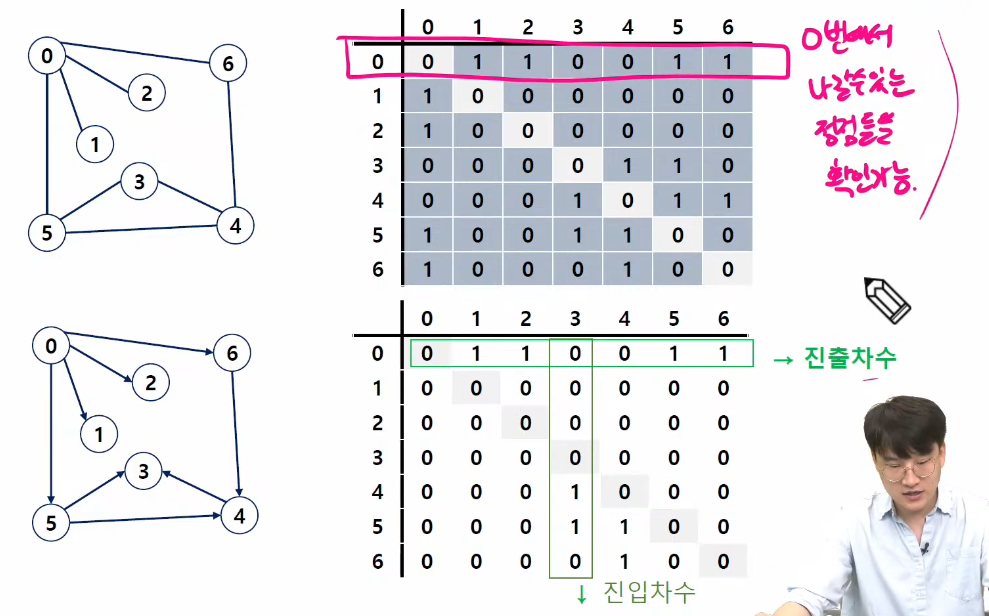 

- 두 정점을 연결하는 간선의 유무를 행렬로 표현
  - |V| x |V| 정방 행렬
  - 행 번호와 열 번호는 그래프의 정점에 대응
  - 두 정점이 인접되어 있으면 1, 그렇지 않으면 0으로 표현
  - 무향그래프
    - i번째 행의 합 = i번째 열의 합 = V의 차수
  - 유향 그래프
    - 행 i의 합 = V의 진출 차수
    - 열 i의 합 = V의 진입 차수

  
  - 인접 행렬의 단점은?

  
### 인접 리스트

- 각 정점에 대한 인접 정점들을 순차적으로 표현
- 하나의 정점에 대한 인접 정점들을 각각 노드로 하는 연결 리스 트로 저장
- 연결리스트가 정석이지만 실제로는 삽입 삭제가 많아서 간단한 인접 행렬보단 인접 리스트로 저장한다


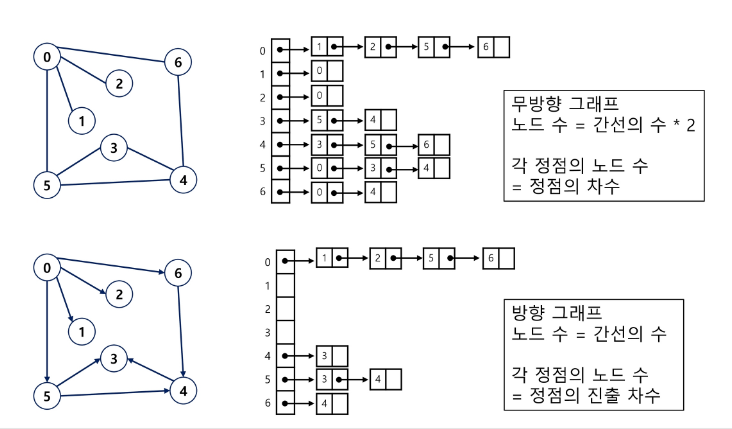

- 무방향 그래프의 경우엔 양방향이기 때문에 간선의 수는 2배가 됨(노드 수 != 간선 수 x2 헷갈리게 적어두신것..)
- 유방향 그래프에서는 1개씩이기 때문에 간선의 수에 변화 없음

# DFS

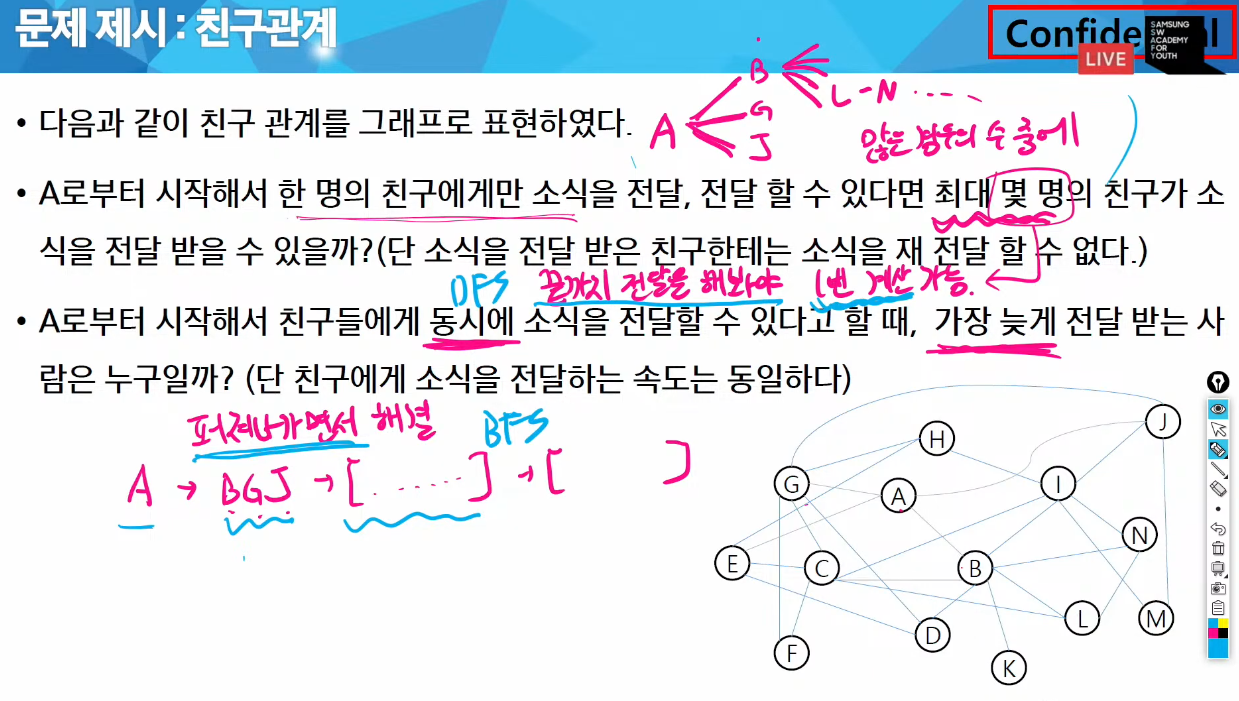

### 그래프 순회(탐색)
- 그래프 순회는 비선형구조인 그래프로 표현된 모든 자료(정점)를 빠짐없이 탐색하는 것을 의미한다
- 두 가지 방법
  - 깊이 우선 탐색(Depth First Search,DFS)
  - 너비 우선 탐색(Breadth First Search,BFS)

### 깊이우선탐색
- 시작 정점의 한 방향으로 갈 수 있는 경로가 있는 곳까지 깊이 탐색해가다가 더 이상 갈 곳이 없게 되면, 가장 마지막에 만났던 갈림길 간선이 있는 정점으로 되돌아와서 다른 방향의 정점으로 탐색을 계속 반복하여 결국 모든 정점을 방문하는 순회 방법
- 가장 마지막에 만났던 갈림길의 정점으로 되돌아가서 다시 깊이 우선 탐색을 반복해야 하므로 후입선출 구조의 스택 사용


![9-DFS 연습문제1.PNG](<attachment:9-DFS 연습문제1.PNG>)

- 아래 : 작은 수를 먼저 탐색
- 위 : 큰 수를 먼저 탐색
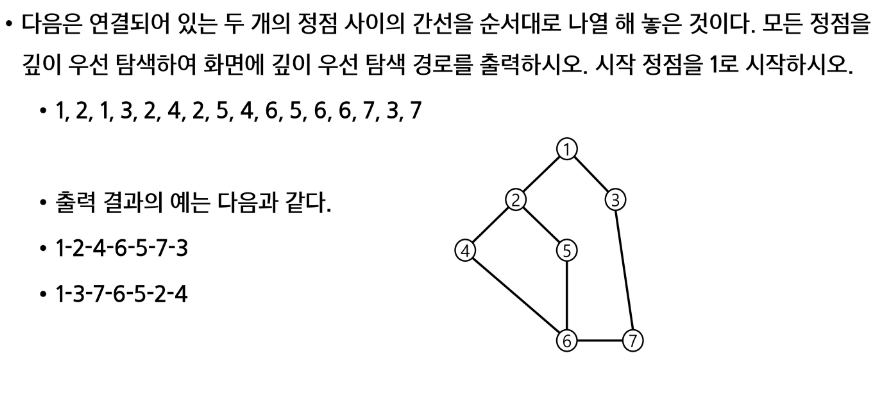

In [ ]:
# page25. 연습문제1
import sys
sys.stdin = open("graph.txt", "r")


# 시작점: 1번부터 시작
# 끝점: 1번에서 갈 수 있는 모든 정점을 방문하면 종료
#       (visited 처리 덕분에, 기저조건 없이도 자연스럽게 종료됨)
def dfs(node):
    print(node, end=' ')  # 현재 노드 출력

    # 현재 정점에서 연결되어있는 노드들을 탐색
    # graph[node][::-1] : 숫자가 큰 노드부터 탐색 (후보군을 뒤집어주면 된다.)
    for next_node in graph[node]:
        if visited[next_node]:  # 이미 방문했다면 통과
            continue

        visited[next_node] = 1  # 방문 처리
        dfs(next_node)          # 다음 정점으로 이동


N, M = map(int, input().split())
# 비어있는 리스트를 N + 1번 반복하면서 생성
# 1. 비어있는 리스트: 아직 갈 수 있는 곳이 없다.
# 2. N + 1번 : 0번 인덱스를 버린다. (문제에서 노드번호가 1번부터 시작)
# # --> 인접리스트를 만들기위해 아래와 같이 정의
graph = [[] for _ in range(N + 1)]

# graph = [[0] * (N + 1) for _ in range(N + 1)]  # 인접행렬 예시
visited = [0] * (N + 1)

# 연결 정보를 저장
for _ in range(M):
    s, e = map(int, input().split())
    # 양방향 그래프이므로, 시작<->끝점을 바꾸면서 저장
    graph[s].append(e)
    graph[e].append(s)  # 문제가 방향 그래프라면, 바꾼 정보를 저장하면 버그난다!

visited[1] = 1  # 출발지 방문 처리
dfs(1)


# BFS
- 너비우선탐색은 탐색 시작점의 인접한 정점들을 먼저 모두 차례로 방문한 후에, 방문했던 정점을 시작점으로 하여 다시 인접한 정점들을 차례로 방문하는 방식
- 인접한 정점들에 대해 탐색을 한 후, 차례로 다시 너비우선탐색을 진행해야 하므로, 선입 선출 형태의 자료구조인 큐를 활용함

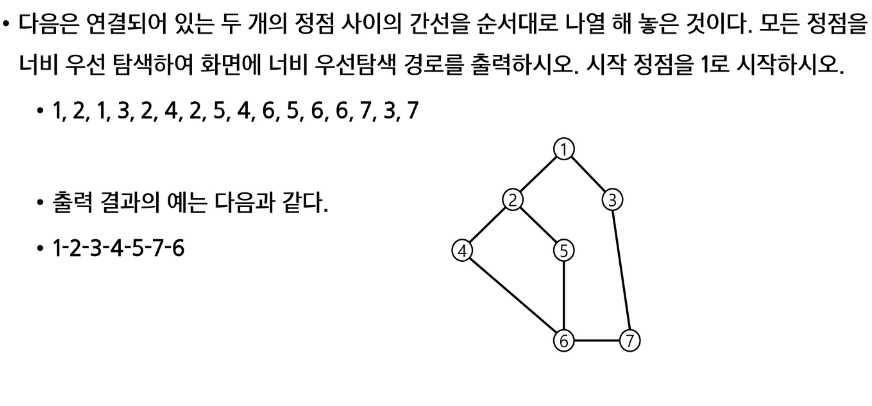

In [ ]:
# page31. 연습문제2
import sys
sys.stdin = open("graph.txt", "r")


def bfs(node):
    q = [node]  # 선입선출 구조인 Queue 처럼 활용할 것이다.

    # q 에 저장되는 데이터: 다음에 처리할 데이터 (후보군)
    while q:  # 갈 수 있는 곳이 없을 때까지
        now = q.pop(0)  # 가장 앞에 있는 데이터를 뽑는다.

        print(now, end=' ')  # 현재 노드 출력

        # 현재 정점에서 인접한 정점들을 확인
        for next_node in graph[now]:
            if visited[next_node]:  # 이미 방문한 정점이면 통과
                continue
                
            visited[next_node] = 1  # 방문 처리
            q.append(next_node)     # 후보군에 추가(순서가 되면 처리해주세요)


# 그래프를 만드는 코드는 DFS 와 BFS 가 똑같다
# 핵심: 무슨 노드를 먼저 탐색할 것인가!
#   - 갈 수 있으면 끝까지 가자 : DFS
#   - 특정 정점을 기준으로 퍼져나가면서 확인하자 : BFS
N, M = map(int, input().split())
graph = [[] for _ in range(N + 1)]  # 인접리스트로 저장
visited = [0] * (N + 1)
for _ in range(M):
    s, e = map(int, input().split())
    graph[s].append(e)
    graph[e].append(s)

visited[1] = 1
bfs(1)


# Union-Find(Disjoint set)
- 서로소집합 또는 상호배타 집합 : 서로 교집합이 없는 집합(서로 중복 포함된 우너소가 없는 집합)
- 집합에 속한 하나의 특정 멤버를 통해 각 집합들을 구분한다. 이를 대표자(representative)라고 한다.
- 상호배타 집합을 표현하는 방법
  - 연결리스트 , 트리
- 상호배타 집합 연산
  - Make-set(x)
  - Find-set(x)
  - Union(x,y)


In [ ]:
def make_set(n):
    p = [i for i in range(n)]  # 각 원소의 부모를 자신으로 초기화
    return p


def find(x):
    if parents[x] == x:  # x 자기자신이 x 를 바라본다 == 해당 집합의 대표자를 찾았다
        return x

    # x의 부모가 가리키고 있는 정점부터 다시 대표자를 탐색
    return find(parents[x])

def union(x, y):
    # x 와 y 의 대표자를 찾자.
    root_x = find(x)
    root_y = find(y)

    if root_x == root_y:  # 이미 같은 집합이면 끝
        return

    # 다른 집합이라면 더 작은 루트노트에 합친다.
    # 문제에 따라 다르다.
    if root_x < root_y:
        parents[root_y] = root_x  # y 가 바라보는 부모는 x 의 대표자
    else:
        parents[root_x] = root_y


# 예제 사용법
n = 7  # 원소의 개수
parents = make_set(n)  # 집합생성. parents 에 부모 정보들을 저장

union(1, 3)
union(2, 3)
union(5, 6)

print(parents)  # 대표자의 수 == 집합의 수

print('find_set(6) = ', find(6))

target_x = 3
target_y = 4

# 원소 1과 원소 2가 같은 집합에 속해 있는지 확인
if find(target_x) == find(target_y):
    print(f"원소 {target_x}과 원소 {target_y}는 같은 집합에 속해 있습니다.")
else:
    print(f"원소 {target_x}과 원소 {target_y}는 다른 집합에 속해 있습니다.")


In [ ]:
def make_set(n):
    p = [i for i in range(n)]  # 각 원소의 부모를 자신으로 초기화
    r = [0] * n  # 시작 rank 는 모두 0으로 초기화
    return p, r


def find(x):
    # 원소의 부모가 자기자신이다 == 자기가 그 그룹의 대표자
    if parents[x] == x:
        return x

    # 경로 압축 (path compression)을 통해 부모를 루트로 설정
    # parents[x]  # x 가 가리키고 있는 부모
    # find(parents[x])  # x 의 부모로부터 대표자를 찾아와라.
    parents[x] = find(parents[x])
    return parents[x]


def union(x, y):
    root_x = find(x)
    root_y = find(y)

    if root_x == root_y:  # 이미 같은 집합이면 끝
        return

    # rank를 비교하여 더 작은 트리를 큰 트리 밑에 병합
    if ranks[root_x] > ranks[root_y]:
        parents[root_y] = root_x
    elif ranks[root_x] < ranks[root_y]:
        parents[root_x] = root_y
    else:
        # rank가 같으면 한쪽을 다른 쪽 아래로 병합하고 rank를 증가시킴
        parents[root_y] = root_x
        ranks[root_x] += 1


# 예제 사용법
n = 7  # 원소의 개수
parents, ranks = make_set(n)

union(1, 3)
union(2, 3)
union(5, 6)

print('find_set(6) = ', find(6))

target_x = 2
target_y = 3

# 원소 1과 원소 2가 같은 집합에 속해 있는지 확인
if find(target_x) == find(target_y):
    print(f"원소 {target_x}과 원소 {target_y}는 같은 집합에 속해 있습니다.")
else:
    print(f"원소 {target_x}과 원소 {target_y}는 다른 집합에 속해 있습니다.")
